<class 'matplotlib.axes._subplots.AxesSubplot'>


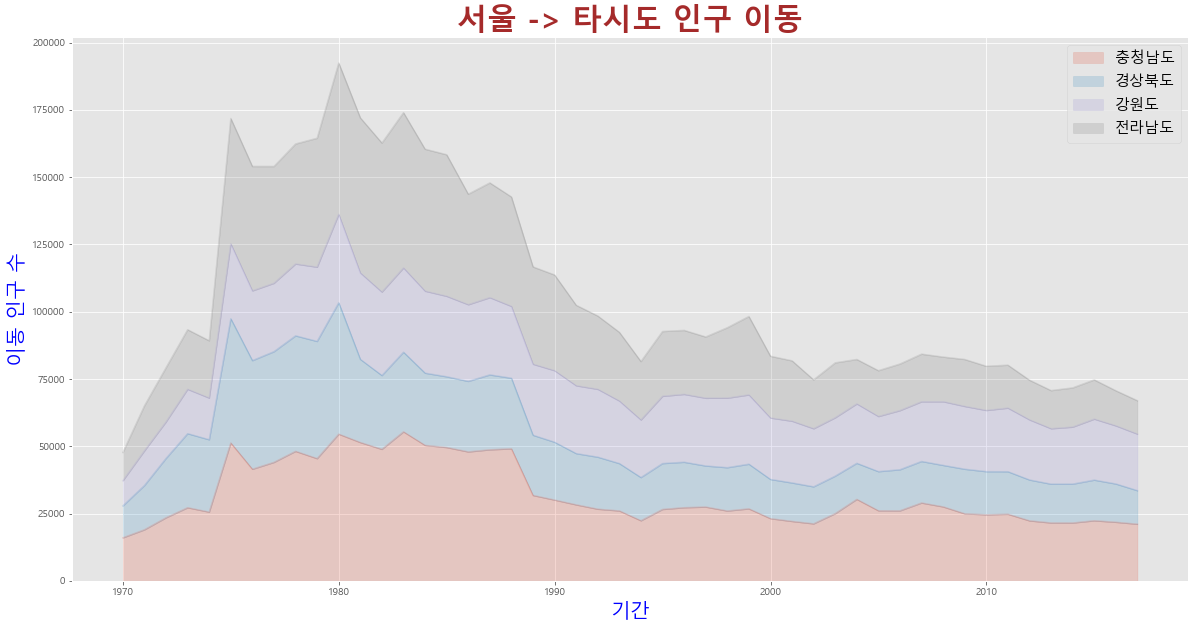

In [1]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./시도별 전출입 인구수.xlsx', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()